Rapid Unsupervised Detection of Events of SpaTial data (RUDEST) Example

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from RUDEST import detect, plot
import pandas as pd
import matplotlib.lines as mlines

In [ ]:
"Data Extraction"
data = pd.read_csv('B_Alt_50_Position.dat', sep='\s+')

In [6]:
"Data Labeling"
mask = (
    data['Lon'].between(-180, -110) & #longitude range can be altered
    data['Lat'].between(-40, 30) #latitude range can be altered
)
df = data.loc[mask, ['Lon','Lat','Bt']]
 
# Get sorted coordinate axes
lons = np.sort(df['Lon'].unique())
lats = np.sort(df['Lat'].unique())[::-1]   # reverse so latitude goes high→low
 
# pivot into an N×M grid
grid = df.pivot(index='Lat', columns='Lon', values='Bt')\
         .reindex(index=lats, columns=lons)
 
X = grid.values    # shape (len(lats), len(lons))
filtered_lon = lons
filtered_lat = lats

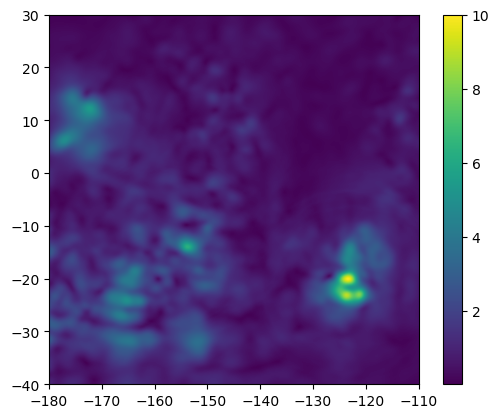

In [7]:
"Plot of Selected 2D Data"
axes = [np.min(filtered_lon),np.max(filtered_lon),np.min(filtered_lat),np.max(filtered_lat)]

plt.figure()
plt.imshow(X, extent=axes)
plt.colorbar()

In [12]:
"Inputs"
p = 25
q = 25
template_moment = (0.222, 0.504, -0.430)
template_height = 0.5
stride_x = 5
stride_y = 5
nu_value = 0.3
n_components = 2

c:\Users\mverduin\Documents\GitHub\AnomalyDetection\RUDEST.py:301: RuntimeWarning: invalid value encountered in divide
  A_filtered = A / coverage #remove any bias from less coverage on the edges


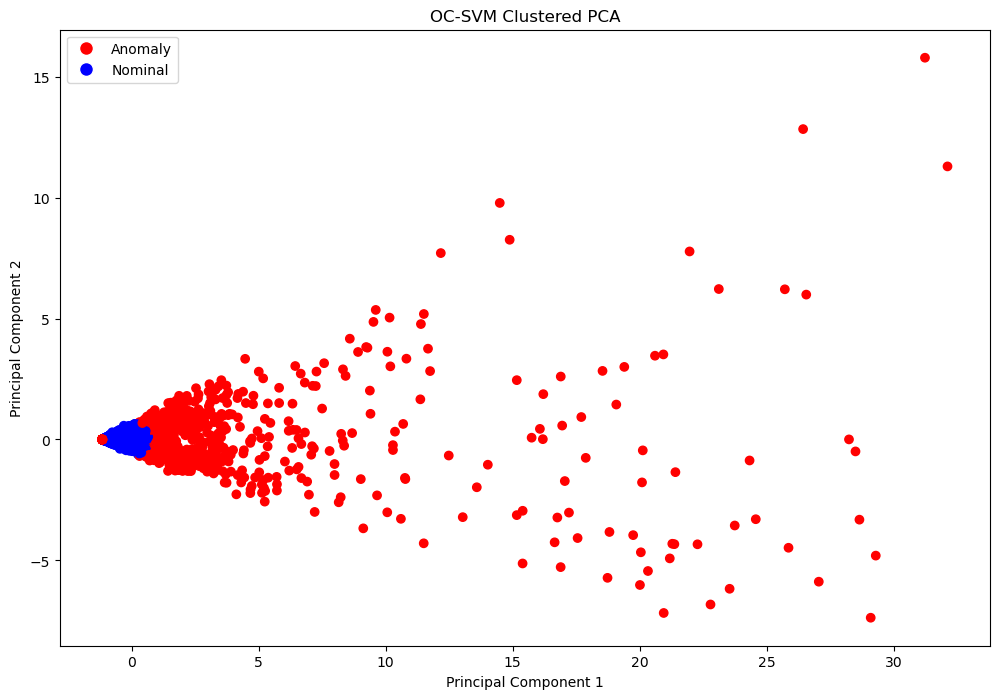

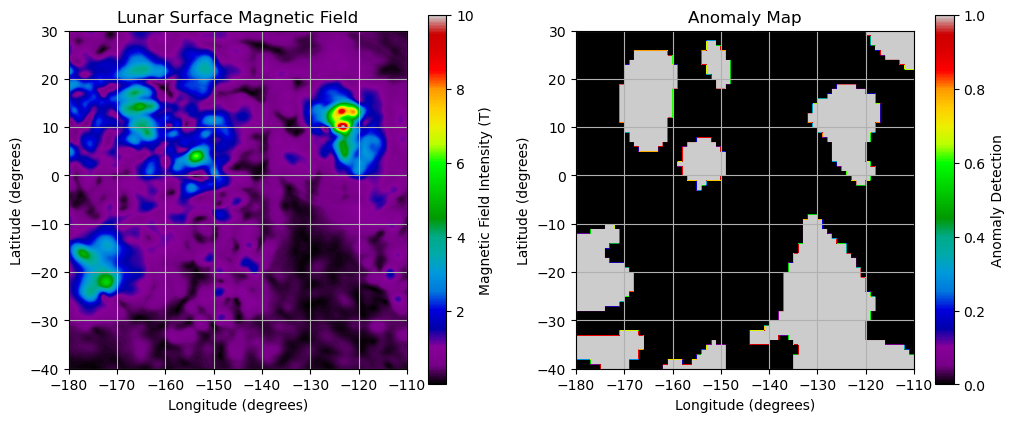

()

In [14]:
[principal_components, y_pred, X, A, A_filtered] = detect(X, p, q, stride_x, stride_y, nu_value, n_components)
plot(principal_components, y_pred, X, A, A_filtered, filtered_lon, filtered_lat, n_components)